[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab05.ipynb)

First there is code below showing decision boundary using SVC with kernel trick.
Because the data is concentric circles the decision boundary is a circle separting two group of points.

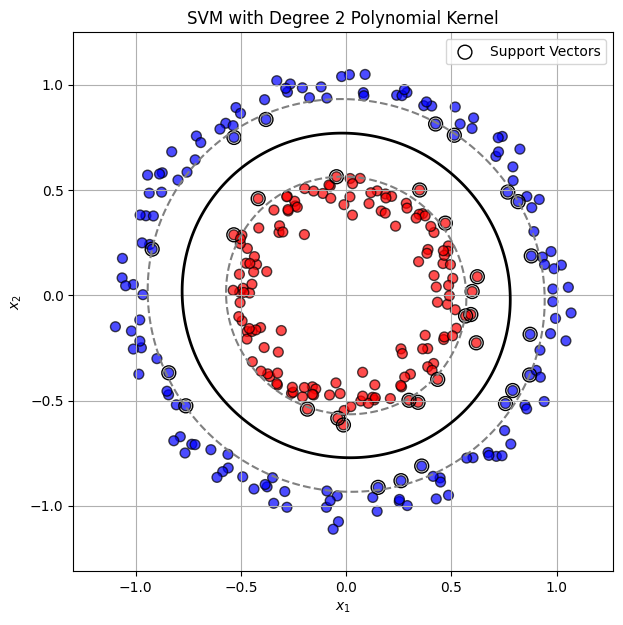

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()

The second code tries to do the same with but with explicitly mapping our input points from 2D to 3D using phi(x) function.
It also transforms the grid from the first code using phi(x) function, getting grid of points in 3D.
Then it takes the points that were close to decision boundary and mark them in new phi-grid.


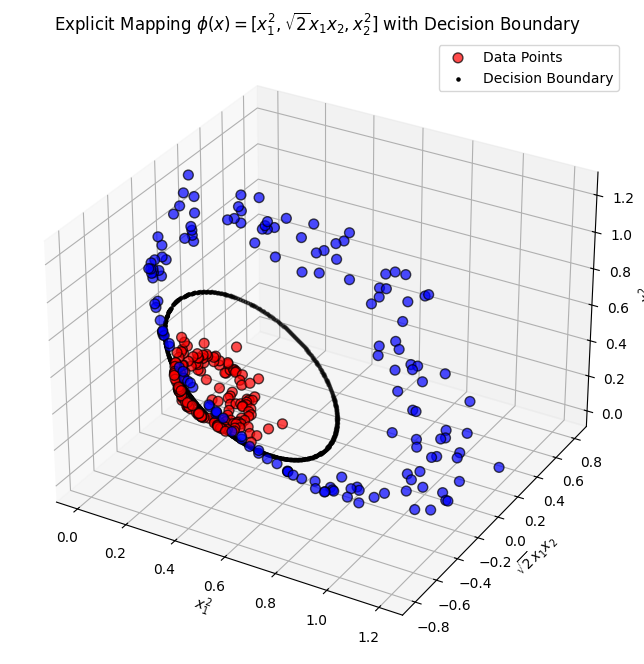

In [13]:

# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()


In the code below I show that phi_grid is not "dense" in 3d, it is not proper grid because this is a function of degree 2 put into 3-dimensional space.
In this code I show original grid and phi_grid in 3d and we can see that phi_grid is not proper 3d-grid.

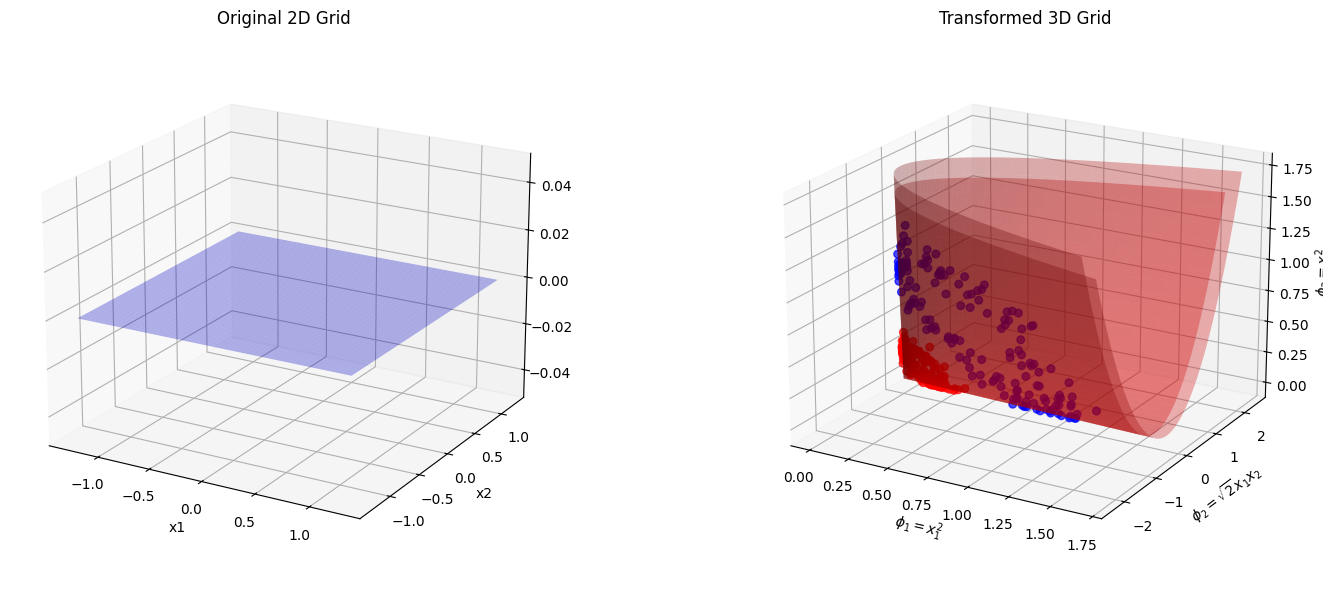

In [14]:
fig = plt.figure(figsize=(16, 6))

# Original 2D Grid
ax1 = fig.add_subplot(121, projection='3d')
original_grid = grid.reshape(xx.shape[0], xx.shape[1], 2)
ax1.plot_surface(original_grid[:,:,0], original_grid[:,:,1], np.zeros_like(xx),
                color='blue', alpha=0.3, label='Original 2D Grid')
ax1.set_title('Original 2D Grid')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('')
ax1.view_init(elev=20, azim=-60)

# Transformed 3D Grid
ax2 = fig.add_subplot(122, projection='3d')

# Plot the transformed grid
phi_grid_reshaped = phi_grid.reshape(xx.shape[0], xx.shape[1], 3)
ax2.plot_surface(phi_grid_reshaped[:,:,0], phi_grid_reshaped[:,:,1], phi_grid_reshaped[:,:,2],
                color='red', alpha=0.3, label='Transformed Grid')

# Plot the original data points in transformed 3D grid
ax2.scatter(phi_X[:,0], phi_X[:,1], phi_X[:,2], c=y, cmap='bwr', s=30, alpha=0.7)

ax2.set_title('Transformed 3D Grid')
ax2.set_xlabel('$\phi_1 = x_1^2$')
ax2.set_ylabel('$\phi_2 = \sqrt{2}x_1x_2$')
ax2.set_zlabel('$\phi_3 = x_2^2$')
ax2.view_init(elev=20, azim=-60)

plt.tight_layout()
plt.show()

**1) Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane, even though we know the classifier’s separating surface is mathematically linear in that space?**

The reason is that the original grid transformed using phi function of degree 2 does not create proper 3d grid, as we can see on the plots above.
That is why our decition boundary is only the circle, because decision plane (how we expected it to be) **intersects** this curved surface (phi_grid) in the points that form a circle.

**2) Secondary Question**

**Explain why a hyperplane in 3D becomes a circular (or elliptical) curve when viewed back in the original 2D plane of the dataset.**

That is because explicit mapping $\phi(x)$ transforms quadratic relationships in 2D to linear ones in 3D.
 The key equation:
 $$w_1x_1^2 + w_2\sqrt{2}x_1x_2 + w_3x_2^2 + b = 0$$
describes a circle/ellipse in 2D space, which matches what we see in the first plot.


**Geometry Explanation**

The kernel trick works by:

1. Mapping 2D points $(x_1, x_2)$ to 3D via $\phi(x) = [x_1^2, \sqrt{2}x_1x_2, x_2^2]$
2. Finding a linear separator (plane) in this 3D space
3. The plane's intersection with the paraboloid(phi_grid) gives us the decision boundary which is circle in 2d-grid showed in the first plot.